In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go




In [216]:
df_merged = pd.read_csv('D:\\Projo\\Projet-Data-IA\\Merged_all_tables\\merged_all_tables.csv', sep=',')

In [217]:

# def minutes_to_hours_minutes(minutes):
#     hours = int(minutes / 60)
#     remaining_minutes = minutes % 60
#     return f"{hours} heures {remaining_minutes} minutes"

# df_merged['runtimeMinutes'] = df_merged['runtimeMinutes'].apply(minutes_to_hours_minutes)
# # rename de la colonne runtimeMinutes à duration
# df_merged.rename(columns={'runtimeMinutes': 'duration'}, inplace=True)

In [218]:
def clean_actors_list(actors_list):
    # Convertir la liste en un ensemble pour supprimer les doublons, puis trier
    unique_actors = sorted(set(actors_list))
    # Convertir l'ensemble trié en une chaîne de caractères séparée par des virgules
    cleaned_list = ', '.join(unique_actors)
    return cleaned_list

# Appliquer la fonction à chaque élément de la colonne "Actors_Actresses"
df_merged['Actors_Actresses'] = df_merged['Actors_Actresses'].apply(eval).apply(clean_actors_list)
df_merged['production_companies_name'] = df_merged['production_companies_name'].apply(eval).apply(clean_actors_list)

df_merged.head(5)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genres,overview,poster_path,backdrop_path,popularity,production_companies_name,Director_name,Actors_Actresses
0,tt0069049,De l'autre côté du vent,6.7,8019,2018.0,122.0,Drama,"Surrounded by fans and skeptics, grizzled dire...",/kFky1paYEfHxfCYByEc9g7gn6Zk.jpg,/wXUcSJG6dqNKgIRgqYqX98UA1wz.jpg,8.002,"Les Films de l'Astrophore, SACI",Orson Welles,"Cameron Mitchell, Edmond O'Brien, John Huston,..."
1,tt0080440,Le Chat noir,5.8,4233,1981.0,92.0,Horror,When a young couple goes missing in a sleepy E...,/69bYJOdhjXXVycXd8mZdlpyYgyr.jpg,/mSdpQhD0AzwKiwGiWhMqn04XbWB.jpg,6.053,"Italian International Film, Selenia Cinematogr...",Lucio Fulci,"Al Cliver, Bruno Corazzari, Dagmar Lassander, ..."
2,tt0080509,Celles qu'on n'a pas eues...,5.7,176,1981.0,105.0,Comedy,"In a train compartment, 6 people who do not kn...",/nuZVeqegSWiPC67fKobuH3kWQKx.jpg,/gkoBsJ871p9OCaCZFqfCAPIyLTc.jpg,1.508,"France 2, Les Films Français, Nordine FIlms, T...",Pascal Thomas,"Anouk Ferjac, Bernard Menez, Daniel Ceccaldi, ..."
3,tt0080536,Les âges du coeur,5.7,691,1981.0,106.0,Drama,"A 60-year-old artist shares a secret, platonic...",/1AMXUHd4hVtHwS5e0BDSjFVPEMV.jpg,/5i7ijXF35GJsBEucYut0PwR1e5D.jpg,2.783,"Film Consortium of Canada, Milton Zyrman Produ...",Jules Dassin,"Donann Cavin, Elan Ross Gibson, Larry Ewashen,..."
4,tt0080554,Colegas,6.5,694,1982.0,98.0,Drama,The plot follows the misadventures of two youn...,/2ANdbBwmYdPQkWbc2NsAOAkGEZt.jpg,/obqdSsF9PPdKPhapBeI9drGTWhM.jpg,1.924,Ópalo Films,Eloy de la Iglesia,"Antonio Flores, Francisco Casares, Isabel Pera..."


In [219]:
df_merged.dtypes


titleId                       object
title                         object
averageRating                float64
numVotes                       int64
startYear                    float64
runtimeMinutes               float64
genres                        object
overview                      object
poster_path                   object
backdrop_path                 object
popularity                   float64
production_companies_name     object
Director_name                 object
Actors_Actresses              object
dtype: object

In [220]:
df_merged.describe()

,averageRating,numVotes,startYear,runtimeMinutes,popularity
count,4734.000000,4.734000e+03,4734.000000,4734.000000,4734.000000
mean,6.370194,1.123763e+04,2007.474229,103.239544,5.827385
std,0.723375,7.299382e+04,11.985751,15.335438,22.093123
min,5.000000,1.010000e+02,1981.000000,85.000000,0.600000
25%,5.800000,3.142500e+02,1999.000000,93.000000,1.400000
50%,6.400000,8.225000e+02,2010.000000,100.000000,2.720500
75%,6.900000,2.875250e+03,2018.000000,110.000000,5.950250
max,9.300000,2.878611e+06,2024.000000,238.000000,1107.559000


In [221]:
# Les 20 films les mieux notés de 1980 à 2024

df_sorted_avg =  df_merged.sort_values(by='averageRating', ascending=False)
df_sorted_avg.head(20)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genres,overview,poster_path,backdrop_path,popularity,production_companies_name,Director_name,Actors_Actresses
771,tt0111161,Les évadés,9.3,2878611,1994.0,142.0,Drama,Framed in the 1940s for the double murder of h...,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,84.139,Castle Rock Entertainment,Frank Darabont,"Bob Gunton, Clancy Brown, Gil Bellows, James W..."
3316,tt21093976,National Theatre Live: Prima Facie,9.1,1734,2022.0,120.0,Drama,"Tessa is a young, brilliant barrister. From wo...",/syfuDjtTVGgEivV5TlV7k6QZay.jpg,/BcKs9SKK76hxeprG8NcMTd4iZN.jpg,4.184,"Echo Lake Entertainment, Empire Street Product...",Justin Martin,Jodie Comer
2374,tt11737772,Chal Mera Putt 2,8.9,3432,2020.0,124.0,Drama,A tale of everlasting love between illegal imm...,/nz1EnqItS3KmeRnRiuWjONnrNVE.jpg,/itX3uCksEUcg37jfPW8Ja2cYVPR.jpg,1.960,"Gillz Network, Omjee Star Studios, Rhythm Boyz...",Janjot Singh,"Agha Majid, Akram Udaas, Amrinder Gill, Garry ..."
4307,tt6857412,Cinema Twain,8.8,111,2019.0,90.0,Comedy,"Val Kilmer, master of reinvention, becomes Mar...",/atgYsfIH9uGWre4cznTd456GN4A.jpg,/8uPwLzu4EH3N3xRt4ofQMdxHOHO.jpg,1.541,Val Art LTD,Val Kilmer,Val Kilmer
1011,tt0137523,Fight Club,8.8,2314328,1999.0,139.0,Drama,A ticking-time-bomb insomniac and a slippery s...,/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg,/hZkgoQYus5vegHoetLkCJzb17zJ.jpg,58.660,"20th Century Fox, Atman Entertainment, Fox 200...",David Fincher,"Brad Pitt, Christina Cabot, David Andrews, Edw..."
4493,tt8176054,Pariyerum Perumal,8.7,18342,2018.0,154.0,Drama,A law student from a lower caste begins a frie...,/2G2Pp9Ym0ca9NIrjDF7EOWNrbZb.jpg,/sX8FMSuzhTxU04suSfev26iKkBj.jpg,3.730,"Lyca Productions, Neelam Productions",Mari Selvaraj,"'Poo' Ram, Anandhi, Anthony Dasan, G. Marimuth..."
2212,tt10811166,The Kashmir Files,8.6,573495,2022.0,170.0,Drama,"Based on a true tragedy, the emotionally trigg...",/k079zl4TcFVK0n5CypQeYqSkwdU.jpg,/fGIrwBpsouzVYQKcOii88lA1MXY.jpg,7.820,"Abhishek Agarwal Arts, Zee Studios",Vivek Agnihotri,"Anupam Kher, Bhasha Sumbli, Chinmay Mandlekar,..."
2151,tt10469118,Hellaro,8.6,1586,2019.0,121.0,Drama,A group of suppressed women from a village in ...,/b1rnAdQe2wxnBMqYhhvC34O3lLC.jpg,/luWp6gftSHtz1670079e5VepJOh.jpg,1.363,Harfanmaula Films,Abhishek Shah,"Aarjav Trivedi, Brinda Trivedi, Firoz Arab, Ja..."
611,tt0103767,Baraka,8.5,40917,1992.0,96.0,Documentary,A paralysingly beautiful documentary with a gl...,/ldEuJQ4z7zEvL7iXraESWBUfQcz.jpg,/c0QYwNyeURswT7fxmR2mlfpdk0l.jpg,10.121,Magidson Films,Ron Fricke,Patrick Disanto
4505,tt8267604,Capharnaüm,8.4,104537,2018.0,126.0,Drama,"Zain, a 12-year-old boy scrambling to survive ...",/cqkqrIDzvkFRWVbRRQLqtkXQoPu.jpg,/1p6cMqrxwLjTHmruMCWfpbTAxvt.jpg,28.900,"Boo Pictures, Cedrus Invest Bank, Clandestino ...",Nadine Labaki,"Alaa Chouchnieh, Boluwatife Treasure Bankole, ..."


In [222]:
# Moyenne durée des 20 films les mieux notés
df_mean_avg = df_sorted_avg['runtimeMinutes'].head(20).mean()
df_mean_avg.round()

122.0

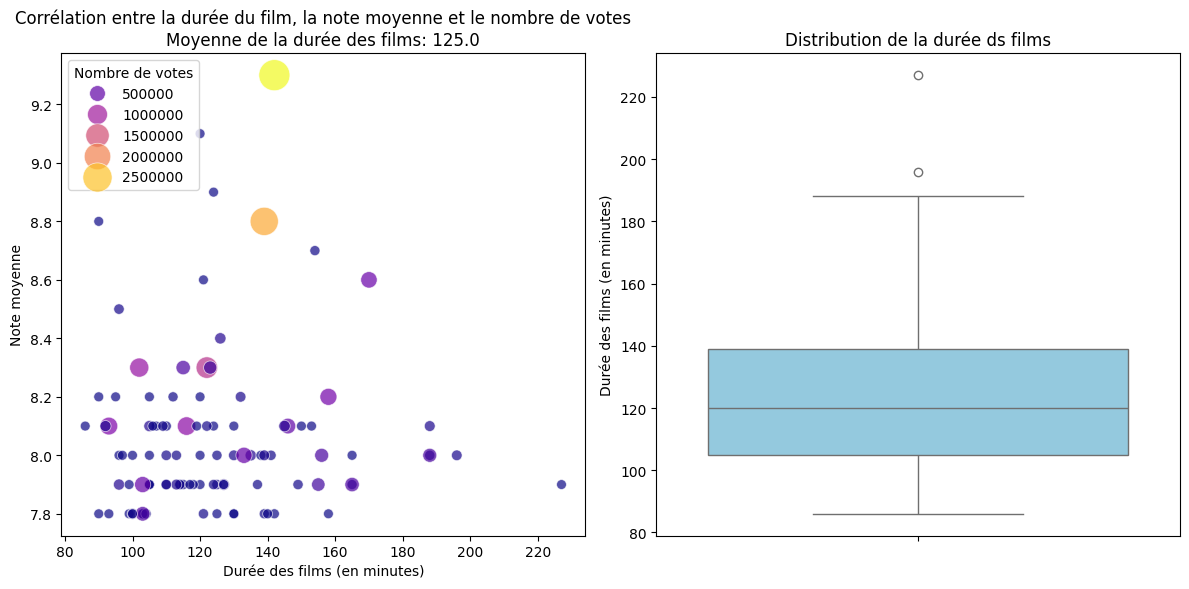

In [223]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Trier le DataFrame selon la colonne 'averageRating' et sélectionner les 20 premières lignes
df_top_20 = df_sorted_avg.sort_values(by='averageRating', ascending=False).head(100)

# Nuage de points avec 'runtimeMinutes' sur l'axe x, 'averageRating' sur l'axe y et 'numVotes' comme taille des points
sns.scatterplot(data=df_top_20, x='runtimeMinutes', y='averageRating', hue='numVotes', palette='plasma', size='numVotes', sizes=(50, 500), alpha=0.7, ax=axes[0])

# Barre de couleur pour expliquer la signification des couleurs
axes[0].legend(title='Nombre de votes', loc='upper left')

axes[0].set_xlabel('Durée des films (en minutes)')
axes[0].set_ylabel('Note moyenne')
axes[0].set_title(f'Corrélation entre la durée du film, la note moyenne et le nombre de votes\nMoyenne de la durée des films: {df_top_20["runtimeMinutes"].mean().round()}')

# Graphique boxplot pour 'runtimeMinutes'
sns.boxplot(data=df_top_20, y='runtimeMinutes', ax=axes[1], color='skyblue')

# Ajouter des labels et un titre
axes[1].set_ylabel('Durée des films (en minutes)')
axes[1].set_title('Distribution de la durée ds films')


plt.tight_layout()
plt.show()



In [224]:
# Top 20 des films les plus votés
df_sorted_numVotes =  df_merged.sort_values(by='numVotes', ascending=False)
df_sorted_numVotes.head(20)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genres,overview,poster_path,backdrop_path,popularity,production_companies_name,Director_name,Actors_Actresses
771,tt0111161,Les évadés,9.3,2878611,1994.0,142.0,Drama,Framed in the 1940s for the double murder of h...,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,84.139,Castle Rock Entertainment,Frank Darabont,"Bob Gunton, Clancy Brown, Gil Bellows, James W..."
1011,tt0137523,Fight Club,8.8,2314328,1999.0,139.0,Drama,A ticking-time-bomb insomniac and a slippery s...,/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg,/hZkgoQYus5vegHoetLkCJzb17zJ.jpg,58.660,"20th Century Fox, Atman Entertainment, Fox 200...",David Fincher,"Brad Pitt, Christina Cabot, David Andrews, Edw..."
1099,tt0169547,American Beauty,8.3,1208340,1999.0,122.0,Drama,"Lester Burnham, a depressed suburban father in...",/wby9315QzVKdW9BonAefg8jGTTb.jpg,/DztBnZaqmla2sGUW9s8AyOmskT.jpg,26.384,"DreamWorks Pictures, Jinks/Cohen Company",Sam Mendes,"Allison Janney, Annette Bening, Chris Cooper, ..."
1116,tt0180093,Requiem for a Dream,8.3,896207,2000.0,102.0,Drama,The hopes and dreams of four ambitious people ...,/nOd6vjEmzCT0k4VYqsA2hwyi87C.jpg,/g1U311jgL4DJbGgvIZgiCfHp44Q.jpg,14.092,"Artisan Entertainment, Protozoa Pictures, Thou...",Darren Aronofsky,"Christopher McDonald, Ellen Burstyn, Janet Sar..."
2290,tt1119646,Very Bad Trip,7.7,843116,2009.0,100.0,Comedy,When three friends finally come to after a rau...,/uluhlXubGu1VxU63X9VHCLWDAYP.jpg,/2o0PKGmnSgCGkzoSePNAqse8Ure.jpg,73.308,"Green Hat Films, Legendary Pictures, Warner Br...",Todd Phillips,"Bradley Cooper, Ed Helms, Heather Graham, Jeff..."
2441,tt1205489,Gran Torino,8.1,813342,2008.0,116.0,Drama,Disgruntled Korean War veteran Walt Kowalski s...,/zUybYvxWdAJy5hhYovsXtHSWI1l.jpg,/wmsePXV2z1b6ecXuKKrFbG0Q92P.jpg,21.048,"Double Nickel Entertainment, Gerber Pictures, ...",Clint Eastwood,"Ahney Her, Bee Vang, Brian Haley, Brian Howe, ..."
886,tt0117951,Trainspotting,8.1,723965,1996.0,93.0,Drama,Heroin addict Mark Renton stumbles through bad...,/bhY62Dw8iW54DIhxPQerbuB9DOP.jpg,/3QpmneFEnx4VZeAJ6bmyQrA8nCT.jpg,20.969,"Channel Four Films, Figment Films, Film4 Produ...",Danny Boyle,"Eileen Nicholas, Ewan McGregor, Ewen Bremner, ..."
3002,tt1637725,Ted,6.9,655105,2012.0,106.0,Comedy,"John Bennett, a man whose childhood wish of br...",/osJNr64CNyGhCzdlg6oHt3a6vNA.jpg,/wS9TiAS1WckeTS2IrFg5dRN9WQD.jpg,56.556,"Bluegrass Films, Fuzzy Door Productions, MRC, ...",Seth MacFarlane,"Aedin Mincks, Bill Smitrovich, Giovanni Ribisi..."
1819,tt0469494,There Will Be Blood,8.2,639266,2007.0,158.0,Drama,"Ruthless silver miner, turned oil prospector, ...",/fa0RDkAlCec0STeMNAhPaF89q6U.jpg,/8LRcCJjbQI552BMCuGgYqph8USS.jpg,18.794,"Ghoulardi Film Company, Miramax, Paramount Van...",Paul Thomas Anderson,"Barry Del Sherman, Ciarán Hinds, Daniel Day-Le..."
1957,tt0829482,SuperGrave,7.6,630368,2007.0,113.0,Comedy,Two co-dependent high school seniors are force...,/ek8e8txUyUwd2BNqj6lFEerJfbq.jpg,/giYuvpmpZbwkT3NtX4WdNYqGhxw.jpg,44.526,"Apatow Productions, Columbia Pictures",Greg Mottola,"Aviva Baumann, Bill Hader, Christopher Mintz-P..."


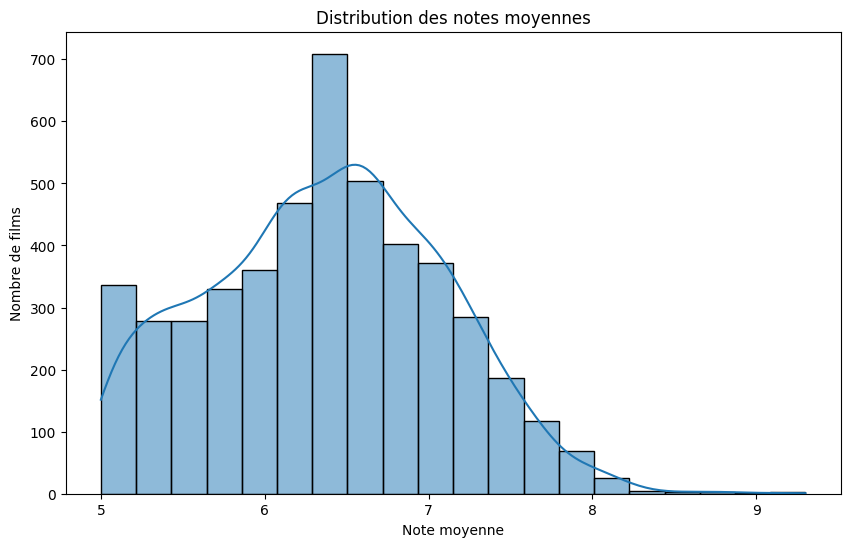

In [225]:
# Moyenne des notes
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['averageRating'], bins=20, kde=True)
plt.title('Distribution des notes moyennes')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de films')
plt.show()


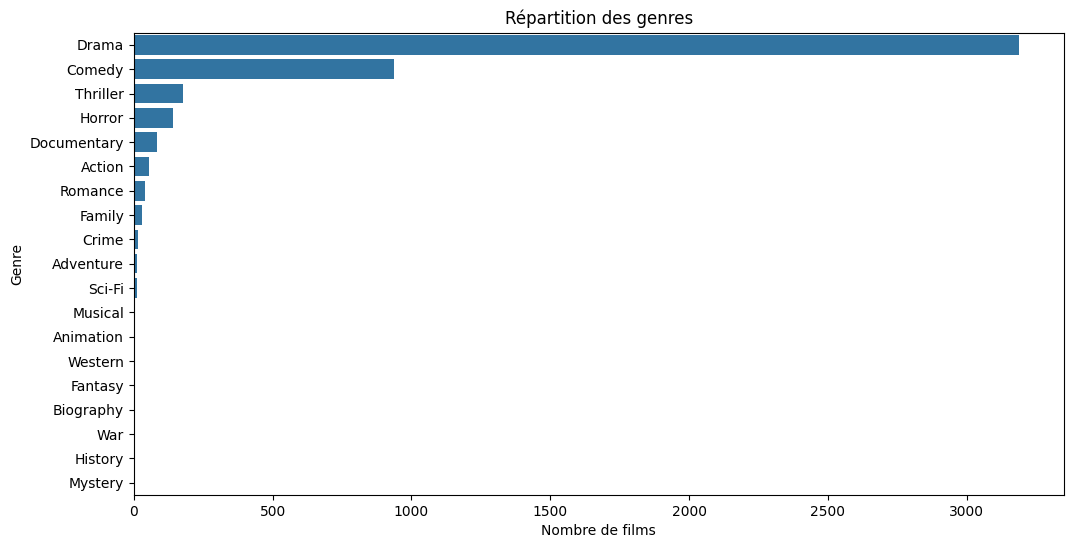

In [226]:
# Diagramme en barres pour les genres
plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['genres'], order = df_merged['genres'].value_counts().index)
plt.title('Répartition des genres')
plt.xlabel('Nombre de films')
plt.ylabel('Genre')
plt.show()


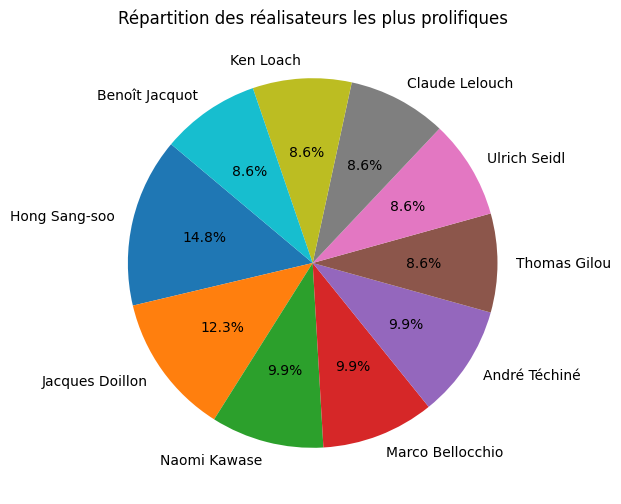

In [227]:
# Diagramme en barres pour les réalisateurs les plus sollicités
# Ajouter les années
top_directors = df_merged['Director_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des réalisateurs les plus prolifiques')
plt.show()

In [236]:
# Diagramme en barres pour les acteurs les plus sollicités
df_merged['Actors_Actresses'].value_counts().head()
# TRIER LES ACTEURS PAR NOMBRE DE FILMS LES PLUS SOLICITES ET LES ANNÉES DE LEURS FILMS

Actors_Actresses
Fernando E. Solanas                                                                                                                                                                    2
Cameron Mitchell, Edmond O'Brien, John Huston, Lilli Palmer, Mercedes McCambridge, Norman Foster, Oja Kodar, Peter Bogdanovich, Robert Random, Susan Strasberg                         1
Benjamin Biolay, Emmanuelle Devos, Hana Laslo, Jean-Noël Cnokaert, Nadir Legrand, Nicole Garcia, Rodolphe Dana, Sarah Adler, Valérie Donzelli, Éric Lartigau                           1
André Marcon, Bobbi Salvör Menuez, Carole Combes, Clément Métayer, Dolores Chaplin, Felix Armand, Hugo Conzelmann, Johnny Flynn, Lola Créton, Martin Loizillon                         1
Alice Morel-Michaud, Christine Harvey, Emmanuel Bilodeau, Evelyne de la Chenelière, François Léveillée, Gildor Roy, Jean-Marie Corbeil, Joseph Mesiano, Paul Doucet, Sylvie Léonard    1
Name: count, dtype: int64

In [229]:
# Compagnies de production les plus populaires



In [230]:
# Nombres de films pa année de sortie de  film

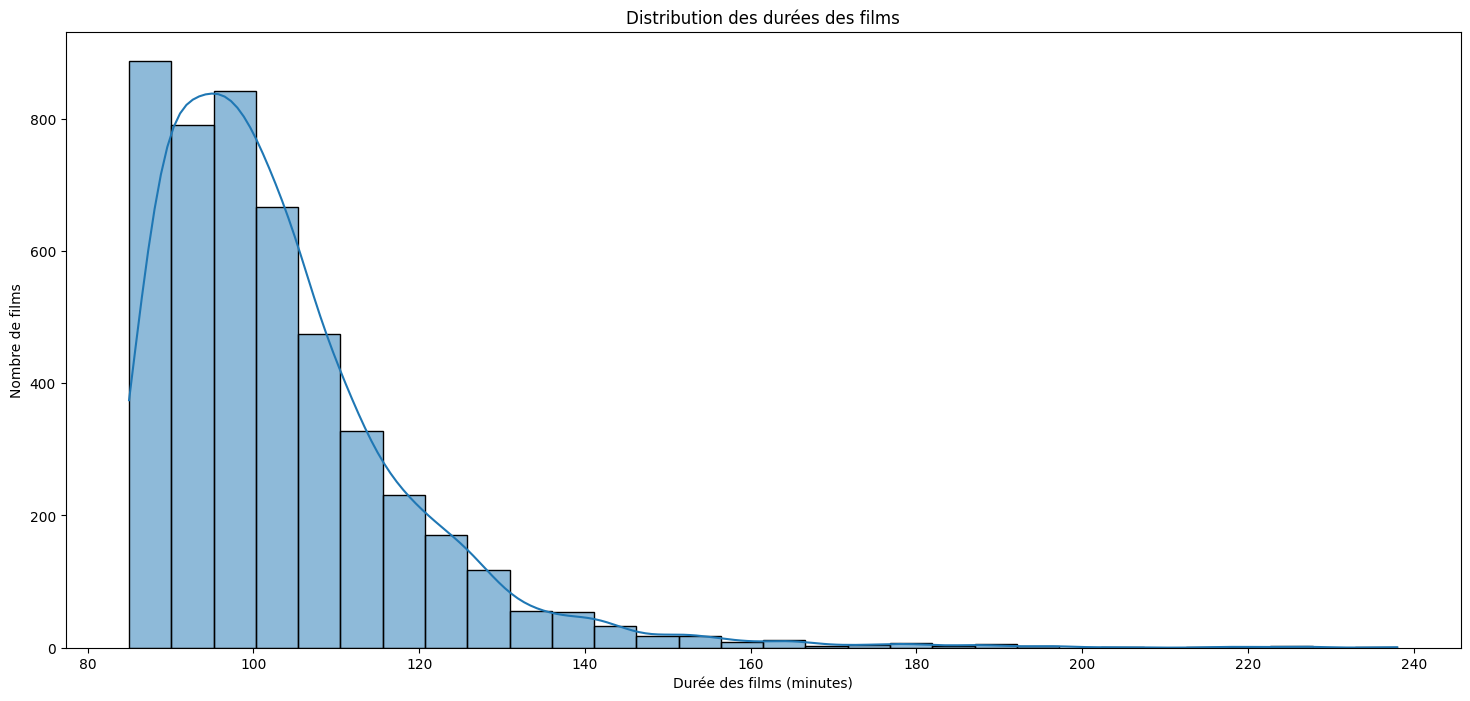

In [231]:
# Distribution des durées des films par le nombre de films

plt.figure(figsize=(18, 8))
sns.histplot(df_merged['runtimeMinutes'], bins=30, kde=True)
plt.title('Distribution des durées des films')
plt.xlabel('Durée des films (minutes)')
plt.ylabel('Nombre de films')
plt.show()



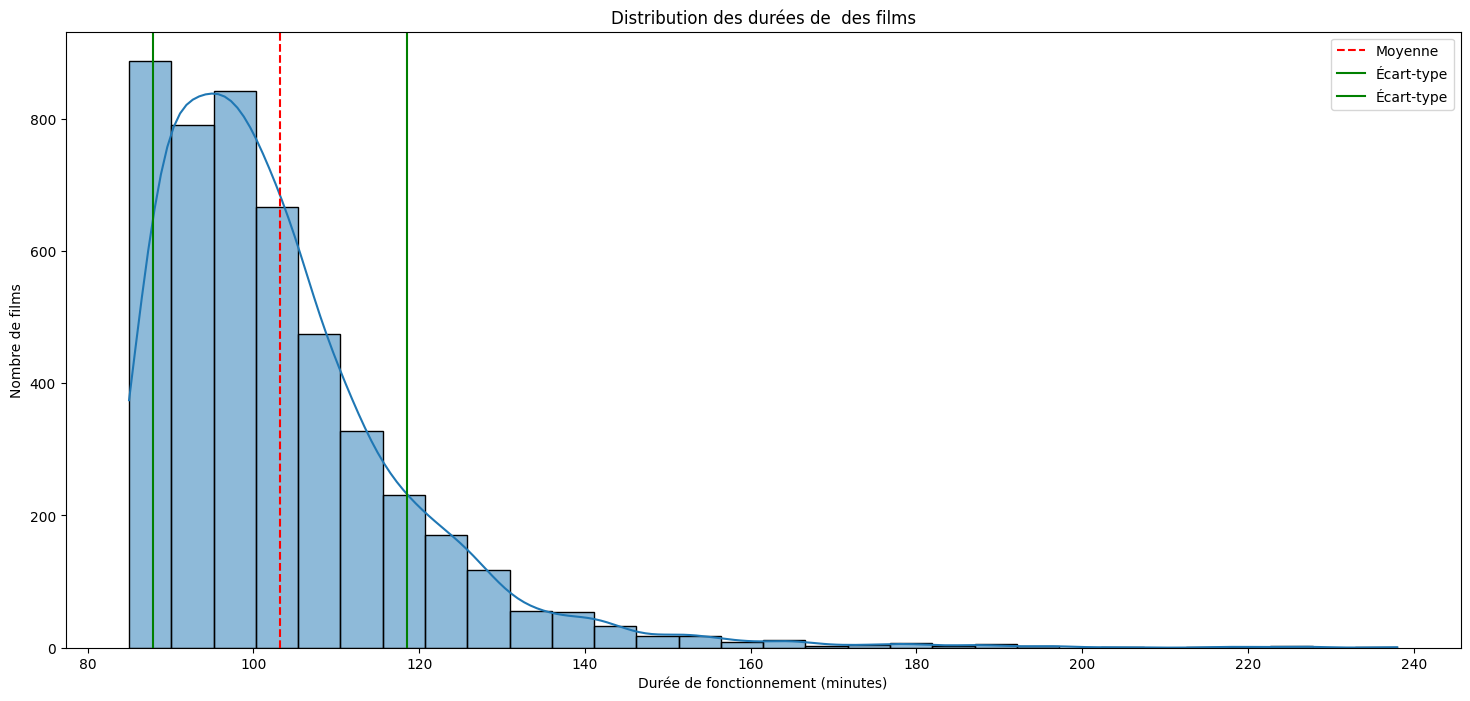

In [232]:
# Calcul de la moyenne et de l'écart-type

plt.figure(figsize=(18, 8))
sns.histplot(df_merged['runtimeMinutes'], bins=30, kde=True)
plt.title('Distribution des durées de  des films')
plt.xlabel('Durée de fonctionnement (minutes)')
plt.ylabel('Nombre de films')

# Calcul de la moyenne et de l'écart-type
mean = df_merged['runtimeMinutes'].mean()
std_dev = df_merged['runtimeMinutes'].std()

# Tracer la moyenne et les lignes pour l'écart-type
plt.axvline(mean, color='r', linestyle='--', label='Moyenne')
plt.axvline(mean + std_dev, color='g', linestyle='-', label='Écart-type')
plt.axvline(mean - std_dev, color='g', linestyle='-', label='Écart-type')

plt.legend()
plt.show()


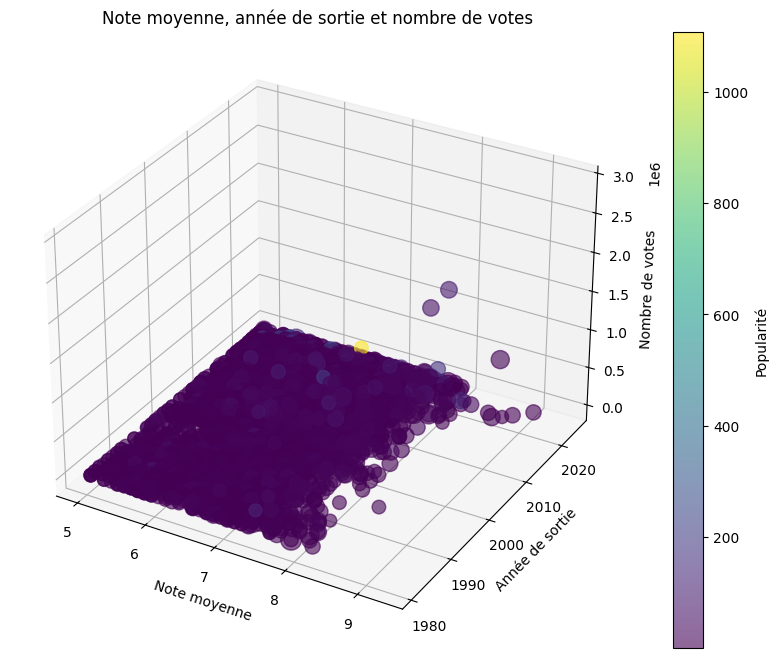

In [233]:
# Note moyenne, année de sortie et nombre de votes
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection='3d')
x = df_merged['averageRating']
y = df_merged['startYear']
z = df_merged['numVotes']
colors = df_merged['popularity']
sizes = df_merged['runtimeMinutes']

scatter = ax.scatter(x, y, z, c=colors, s=sizes, alpha=0.6)

ax.set_xlabel('Note moyenne')
ax.set_ylabel('Année de sortie')
ax.set_zlabel('Nombre de votes')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Popularité')

plt.title('Note moyenne, année de sortie et nombre de votes')

plt.show()
